In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.ensemble import ExtraTreesClassifier 


%matplotlib inline

df = pd.read_csv('fi.csv', names=['score','total_score','Sc','Sc_int_area','complex_normalized','dG_cross','dG_cross/dSASAx100','dG_separated','dG_separated/dSASAx100','dSASA_hphobic','dSASA_int','dSASA_polar','ddg','delta_unsatHbonds','dslf_fa13','fa_atr','fa_dun','fa_elec','fa_intra_rep','fa_intra_sol_xover4','fa_rep','fa_sol','hbond_E_fraction','hbond_bb_sc','hbond_lr_bb','hbond_sc','hbond_sr_bb','hbonds_int','lk_ball_wtd','nres_all','nres_int','omega','p_aa_pp','packstat','per_residue_energy_int','pro_close','rama_prepro','ref','sc_value','side1_normalized','side1_score','side2_normalized','side2_score','yhh_planarity','description','target'])
features = ['total_score','Sc','Sc_int_area','dG_separated','dG_separated/dSASAx100','dSASA_hphobic','dSASA_int','dSASA_polar','ddg','delta_unsatHbonds','fa_atr','fa_dun','fa_elec','fa_intra_rep','fa_intra_sol_xover4','fa_rep','fa_sol','hbond_E_fraction','hbond_bb_sc','hbond_lr_bb','hbond_sc','hbond_sr_bb','hbonds_int','lk_ball_wtd','nres_int']
X = df.loc[:, features].values
y = df.loc[:,['target']].values

# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
print(X)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)
X = scaled
y = np.ravel(y)

[[-6.029700e+02  6.290000e-01  1.829571e+03 -6.101700e+01 -1.745000e+00
   1.941240e+03  3.495689e+03  1.554448e+03 -8.793000e+01  2.400000e+01
  -1.893113e+03  5.360630e+02 -6.093280e+02  4.226000e+00  7.001500e+01
   2.329350e+02  1.154793e+03  2.980000e-01 -7.254200e+01 -9.862600e+01
  -5.650300e+01 -7.002100e+01  1.700000e+01 -3.854500e+01  1.210000e+02]
 [-5.742580e+02  6.360000e-01  1.767190e+03 -6.653300e+01 -1.990000e+00
   1.701027e+03  3.343706e+03  1.642679e+03 -9.164300e+01  3.200000e+01
  -1.870499e+03  5.343510e+02 -6.033330e+02  4.249000e+00  7.227100e+01
   2.131420e+02  1.183512e+03  2.530000e-01 -7.100200e+01 -9.544300e+01
  -5.378900e+01 -6.715700e+01  1.700000e+01 -4.529900e+01  1.200000e+02]
 [-6.517880e+02  6.820000e-01  1.825525e+03 -9.715500e+01 -2.594000e+00
   2.043137e+03  3.745501e+03  1.702365e+03 -1.129590e+02  1.600000e+01
  -1.947270e+03  5.734040e+02 -6.695810e+02  4.213000e+00  7.020600e+01
   2.079300e+02  1.238706e+03  2.470000e-01 -9.373500e+01 -9.9

In [2]:
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# instantiate random forest
forest = RandomForestRegressor(n_jobs = 1, max_depth = 5)

# make X_trn, X_tst, y_trn, y_tst
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size = .25, random_state = 10)


# fit boruta
boruta_selector = BorutaPy(forest, n_estimators = 'auto', random_state =10)
boruta_selector.fit(np.array(X_trn), np.array(y_trn))

# store results
boruta_ranking = boruta_selector.ranking_
selected_features = np.array(features)[boruta_ranking <= 2]


In [3]:
selected_features

array(['delta_unsatHbonds', 'fa_atr', 'fa_elec', 'fa_intra_rep', 'fa_sol',
       'hbond_bb_sc', 'hbond_sr_bb', 'lk_ball_wtd'], dtype='<U22')

In [4]:

features = [ 'dG_separated', 'delta_unsatHbonds', 'fa_atr', 'fa_elec', 'fa_sol',
       'hbond_bb_sc', 'hbond_sr_bb', 'lk_ball_wtd']
X = df.loc[:, features].values

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1, store_covariance=True, solver='svd')
X_lda = lda.fit_transform(X, y)

lda.explained_variance_ratio_


array([1.])

In [5]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)



Coefficients of linear discriminants:


,LD1
0,-0.017602
1,0.091031
2,0.011453
3,-0.038698
4,0.036665
5,-0.037490
6,0.204254
7,0.256832


Automatically created module for IPython interactive environment


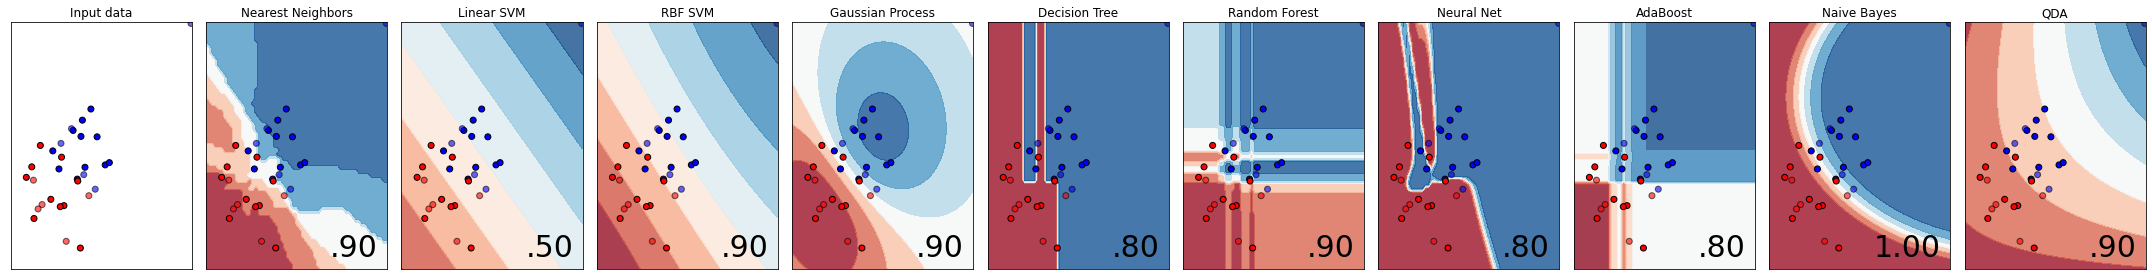

In [7]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

x = ['hbond_sr_bb', 'lk_ball_wtd']
X = df.loc[:, x].values


h = .1  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(C=10, gamma=0.01, kernel='rbf', probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(solver='lbfgs',learning_rate_init=0.001,max_iter=500, activation='logistic', learning_rate='adaptive'),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

linearly_separable = (X, y)

datasets = [
            linearly_separable
            ]

figure = plt.figure(figsize=(30,4))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.30, random_state=100)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.ensemble import ExtraTreesClassifier 


from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

%matplotlib inline

df = pd.read_csv('fi.csv', names=['score','total_score','Sc','Sc_int_area','complex_normalized','dG_cross','dG_cross/dSASAx100','dG_separated','dG_separated/dSASAx100','dSASA_hphobic','dSASA_int','dSASA_polar','ddg','delta_unsatHbonds','dslf_fa13','fa_atr','fa_dun','fa_elec','fa_intra_rep','fa_intra_sol_xover4','fa_rep','fa_sol','hbond_E_fraction','hbond_bb_sc','hbond_lr_bb','hbond_sc','hbond_sr_bb','hbonds_int','lk_ball_wtd','nres_all','nres_int','omega','p_aa_pp','packstat','per_residue_energy_int','pro_close','rama_prepro','ref','sc_value','side1_normalized','side1_score','side2_normalized','side2_score','yhh_planarity','description','target'])
features = ['dG_separated', 'delta_unsatHbonds', 'fa_atr', 'fa_elec', 'fa_sol','hbond_bb_sc', 'hbond_sr_bb', 'lk_ball_wtd']
X = df.loc[:, features].values
y = df.loc[:,['target']].values

X = df.loc[:, features].values
y = df.loc[:,['target']].values
X = StandardScaler().fit_transform(X)

model=GaussianNB()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=10, random_state=4)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


Mean ROC AUC: 0.986
0.99 accuracy with a standard deviation of 0.03
Mean ROC AUC: 0.956
0.96 accuracy with a standard deviation of 0.07


In [11]:
from sklearn.metrics import classification_report,  confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

model = GaussianNB()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print (classification_report(y_test,pred))
print ('\n')
print (confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



[[5 0]
 [0 5]]


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


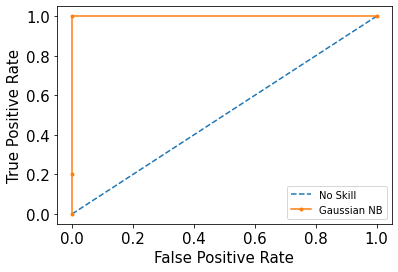

In [12]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=10)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = GaussianNB()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Gaussian NB')
# axis labels
pyplot.xlabel('False Positive Rate', size=15)
pyplot.ylabel('True Positive Rate', size=15)
pyplot.xticks(size=15)
pyplot.yticks(size=15)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()